# PCA from scratch and application

## Linear Algebra

##  Vecteurs propres, valeurs propres avec NumPy

In [326]:
import numpy as np

### Les fonctions d'algèbre linéaires de Python

In [314]:
import numpy.linalg as al

Define a matrix A

Une matrice avec Numpy est entre crochets.  
Chaque ligne est elle-même entre crochets.  

In [323]:
A = np.array([[-9, -6, 2], [10, 7, -2], [-10, -6, 3]])

In [313]:
A

array([[ -9,  -6,   2],
       [ 10,   7,  -2],
       [-10,  -6,   3]])

Rang de la matrice A

In [318]:
al.matrix_rank(A)

3

Valeurs propres, vecteurs propres de A

In [319]:
al.eig(A)

(array([-1.,  1.,  1.]),
 array([[-0.57735027, -0.49236596, -0.3905046 ],
        [ 0.57735027,  0.61545745,  0.80169012],
        [-0.57735027, -0.61545745,  0.45254735]]))

In [317]:
eigen_vals, eigen_vect = al.eig(A)

In [316]:
eigen_vals

array([-1.,  1.,  1.])

Matrice identité

In [320]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Pas de 's' un seul oeil, cyclope

Matrice de uns

In [325]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [315]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [322]:
A[0,0]

-9

Toutes les lignes de la première colonne (0)

In [324]:
A[:,0]

array([ -9,  10, -10])

Inverser la matrice A. Deux méthodes:  

In [321]:
al.inv(A)

array([[ -9.,  -6.,   2.],
       [ 10.,   7.,  -2.],
       [-10.,  -6.,   3.]])

In [331]:
np.linalg.matrix_power(A, -1)

array([[ -9.,  -6.,   2.],
       [ 10.,   7.,  -2.],
       [-10.,  -6.,   3.]])

Transposer une matrice (3 méthodes)

In [332]:
A.T

array([[ -9,  10, -10],
       [ -6,   7,  -6],
       [  2,  -2,   3]])

In [327]:
np.transpose(A)

array([[ -9,  10, -10],
       [ -6,   7,  -6],
       [  2,  -2,   3]])

In [328]:
A.transpose()

array([[ -9,  10, -10],
       [ -6,   7,  -6],
       [  2,  -2,   3]])

## APPLICATIONS: Principal Component Analysis (PCA)

The variance  

How much variance or spread the data has:  

$\text{Var}(\mathbf{X}) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^2$

The covariance:  

Indicates the level to which two variables vary together:  

$\text{Cov}(\mathbf{X}, \mathbf{Y}) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})^t$

$\text{Cov}(\mathbf{X}, \mathbf{X}) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(X_i - \bar{X})^t$

Eigen values, eigen vectors

$ A.v = \lambda v $

The eigen vectors point the direction of the maximum variance.  
The eigen values point the multiplicative coefficient of the changes i.e. its importance.  


PCA steps from scratch:

- Substract the mean from X
- Calculate Cov(X,Y)
- Calculate the eigen values, the eigen vectors from the covariance matrice
- Sort the eigen vectors according to their eigen values in a decreasing order
- Choose the first $k$ eigen vectors that will be the $k$ first new dimensions
- Transform the original n-dimensional data points into $k$ dimensions (projection with .dot product)

In [330]:
A - np.mean(A)

array([[-7.77777778, -4.77777778,  3.22222222],
       [11.22222222,  8.22222222, -0.77777778],
       [-8.77777778, -4.77777778,  4.22222222]])

In [329]:
A.mean(axis=1)

array([-4.33333333,  5.        , -4.33333333])

In [335]:
import numpy as np

class ACP:
    def __init__(self, n_components=4):
        '''The constructor with k the number of eigen vectors
        INPUTS:
            n_components: number of components we want to have'''
        self.n_components = n_components
        self.components = None
    
    def fit(self, X):
        '''The training function'''
        # Center the X matrix
        X = X - np.mean(X, axis=0)

        # The covariance:
        cov = np.cov(X.T)

        # eigen values, eigen vectors:
        eigen_vect, eigen_vals = np.linalg.eig(cov)

        eigen_vect = eigen_vect.T

        # Sort the eigen vectors according to their eigen values:
        idx = np.argsort(eigen_vals)[::-1]
        eigen_vect = eigen_vect[idx]
        eigen_vals = eigen_vals[idx]
        
        # select the highest n_components
        self.components = eigen_vect[:self.n_components]

    def transform(self, X):
        X = X - np.mean(X, axis=0)
        # Project the data
        X_projected = np.dot(X, self.components.T)
        return X_projected


In [340]:
tablo = np.array([4,3,2,9,5,1])
tablo

array([4, 3, 2, 9, 5, 1])

In [333]:
np.argsort(tablo)
idx = np.argsort(tablo)
tablo[idx]

array([1, 2, 3, 4, 5, 9])

In [334]:
np.argsort(tablo)
idx = np.argsort(tablo)[::-1]
tablo[idx]

array([9, 5, 4, 3, 2, 1])

In [336]:
import matplotlib.pyplot as plt
from sklearn import datasets

Test the code

In [346]:
data = datasets.load_iris()

In [339]:
X = data.data
y = data.target

In [341]:
pca = ACP(2)

In [343]:
pca.fit(X)

In [345]:
X_projected = pca.transform(X)

In [337]:
X.shape

(150, 4)

In [338]:
X_projected.shape

(150, 2)

In [344]:
# Considering the two dimensions of the projecting data
x1 = X_projected[:,0]
x2 = X_projected[:,1]

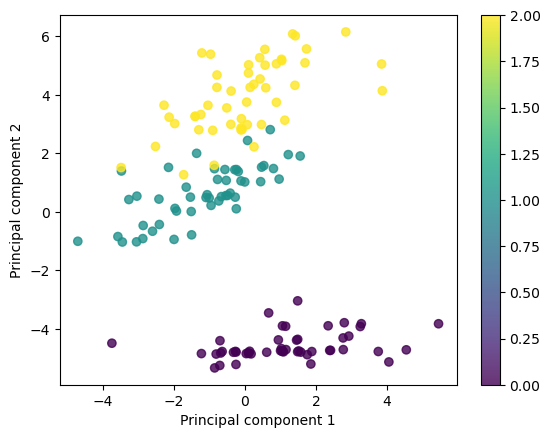

In [342]:
# Data visualization on these two axis
plt.scatter(x1, x2, c=y, alpha=.8)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar()
plt.show()